# Prueba de Gmmhmm y fuzzy clustering basada en datos sin transformation, pca y  factor   

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
os.getcwd()

'/home/davidrendon/Documents/SUP/GMMHMM'

In [2]:
d = pd.read_csv("entrenamiento.csv")
d.head()
d

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
0,0.881962,1.379585,0.686409,0.373569,0.780667,-0.995664,0.102277,-0.442452,0.138900,-0.164821,...,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747,1
1,1.022423,1.613610,1.378754,0.689791,0.740971,-0.858666,0.272442,-0.274770,0.139990,-0.145246,...,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342,1
2,1.111161,1.282333,1.501813,0.635879,0.750587,-1.359903,0.467130,0.044668,0.142089,-0.047032,...,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249,1
3,1.668050,1.371015,1.627049,1.026570,0.600144,-1.692530,0.609323,0.375187,0.159901,0.208658,...,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506,1
4,1.357598,1.473565,1.291146,0.762733,0.703073,-1.255721,0.266256,0.170234,0.145432,0.152065,...,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840,1
5,0.905797,0.861637,1.787185,0.447647,0.695667,-0.801247,0.208916,0.359859,0.147579,-0.160075,...,-1.132920,-0.025192,-0.426588,-0.304547,-0.236008,-0.636994,-1.884550,-2.252556,-2.769677,1
6,1.202490,1.047119,1.583002,0.583866,0.678248,-1.463120,0.324411,0.485710,0.151495,0.056349,...,-1.098153,0.252646,-0.167642,-0.062752,-0.101029,-0.908189,-2.261685,-2.885601,-3.193474,1
7,0.664333,1.155844,0.474020,0.661938,0.665448,-1.891036,0.642821,0.180841,0.144063,0.061344,...,-1.298227,-0.082736,-0.192406,-0.351406,-0.629703,-1.561908,-2.682682,-2.908726,-3.171734,1
8,0.992875,1.430425,0.539385,0.982857,0.549246,-2.273232,0.889152,0.074897,0.158924,0.224183,...,-1.124546,0.152552,-0.033079,-0.201373,-0.605859,-1.198801,-2.783476,-3.429045,-3.673259,1
9,1.409782,0.854388,1.372721,0.479492,0.632554,-2.046287,0.608745,0.274088,0.150197,0.053015,...,-1.829067,-0.082485,-0.213239,-0.003669,-0.194429,-0.929000,-2.715264,-3.459791,-3.414935,1


In [3]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["Permanencia"]  ## this is the label 
ypruebaT=prueba["Transformación"]
trans={'Alta':2,'Baja':0,'Media':1}
ypruebaP=[trans[item] for item in ypruebaP]
ypruebaT=[trans[item] for item in ypruebaT]
pruebaw=prueba.iloc[:,6:] #x without transformation
listnames=list(pruebaw.columns)  ##Columns names
pruebaw.head()
ypruebaT
pruebaw

KeyError: 'Permanencia'

In [4]:
prueba = pd.read_csv("prueba.csv")
prueba.head()
ypruebaP=prueba["target"]  ## this is the label 
prueba


,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
0,0.967779,0.721609,0.826369,0.788970,0.669386,0.204866,-0.093365,-0.040794,0.165461,-0.137948,...,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.086051,-1.240672,-1.706252,1
1,0.344090,0.724196,1.083848,0.397346,0.725761,-0.710576,-0.362875,0.137747,0.147016,-0.445538,...,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-1.062085,-1.581943,-1.785024,1
2,-0.454469,0.499917,-0.004478,-0.224324,0.756357,-0.524987,-0.453335,-0.404264,0.138736,-0.402206,...,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-0.668618,-1.066334,-1.383000,1
3,0.098645,1.036602,-0.109499,0.782767,0.892129,0.763235,0.432294,-0.701777,0.152574,-0.649054,...,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.499750,-0.505977,-0.667956,1
4,0.382637,-0.272463,0.588883,1.308051,0.003683,-0.021581,0.644711,1.869662,-1.116420,0.031687,...,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.091376,-0.624228,-0.321369,1
5,-0.525288,0.094580,-0.708874,1.180686,0.855760,0.660418,0.289622,0.215671,0.165124,-0.462635,...,0.708868,0.963987,-0.570432,-0.688682,-0.226930,0.221637,-0.154145,0.244069,0.375437,1
6,-0.193306,-1.352237,-0.877832,-0.357473,-0.223340,0.300228,-0.239023,-0.268398,-1.196788,-0.587692,...,0.077899,0.589451,-0.249145,-0.273430,-0.084927,-0.343678,0.118776,0.012453,0.271644,1
7,-0.375900,0.114782,-0.526121,-0.264151,0.237836,0.401779,-0.044387,-0.368879,-1.230743,-0.751450,...,-0.437192,0.114116,-0.774177,-1.367703,-0.777009,-0.805050,-0.044871,0.152163,0.264317,1
8,-0.308156,0.068511,-0.669859,0.332230,0.052234,0.220780,-0.150450,0.475695,-1.218440,-0.601170,...,-0.141881,0.227449,-0.997138,-1.313531,-0.829717,-0.556271,-0.016804,-0.136467,0.219988,1
9,-0.079015,0.024963,-0.047641,1.319694,-0.536232,0.042764,1.195381,0.401025,-1.142759,-0.036283,...,-1.482856,-0.116152,-1.960741,-2.808610,-1.937638,-2.478580,-1.538678,-0.954723,-0.998196,1


In [5]:
ypruebaP

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    2
11    2
12    2
13    2
14    2
15    3
16    3
17    3
Name: target, dtype: int64

In [6]:
prueba=prueba.drop('target',1)

In [7]:
prueba.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.967779,0.721609,0.826369,0.788970,0.669386,0.204866,-0.093365,-0.040794,0.165461,-0.137948,...,-1.193796,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.086051,-1.240672,-1.706252
1,0.344090,0.724196,1.083848,0.397346,0.725761,-0.710576,-0.362875,0.137747,0.147016,-0.445538,...,-0.993285,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-1.062085,-1.581943,-1.785024
2,-0.454469,0.499917,-0.004478,-0.224324,0.756357,-0.524987,-0.453335,-0.404264,0.138736,-0.402206,...,-1.114778,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-0.668618,-1.066334,-1.383000
3,0.098645,1.036602,-0.109499,0.782767,0.892129,0.763235,0.432294,-0.701777,0.152574,-0.649054,...,0.455753,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.499750,-0.505977,-0.667956
4,0.382637,-0.272463,0.588883,1.308051,0.003683,-0.021581,0.644711,1.869662,-1.116420,0.031687,...,-2.994605,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.091376,-0.624228,-0.321369


In [8]:
d.describe()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,target
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,...,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,0.229400,-0.149658,-0.138031,0.364666,0.282586,-0.037041,0.167564,0.329218,-0.550490,-0.152753,...,-0.254587,0.045502,-0.267144,-0.226539,-0.117628,-0.123657,-0.398874,-0.473469,-0.395830,1.626866
std,1.166528,0.883180,0.950716,0.775342,0.515795,0.902662,0.612588,0.989575,0.636343,0.618348,...,0.941653,0.933207,0.885275,0.883349,0.816067,0.908636,1.069022,1.173699,1.284973,0.755501
min,-3.632750,-2.110405,-2.752318,-1.732688,-0.801856,-2.273232,-1.576113,-0.855829,-1.260223,-0.780841,...,-1.829067,-1.612970,-1.821592,-2.425724,-2.052413,-1.842752,-2.783476,-3.459791,-3.717506,1.000000
25%,-0.457114,-0.789189,-0.724965,-0.009291,-0.168785,-0.700480,-0.109064,-0.383781,-1.120541,-0.537675,...,-0.953884,-0.697802,-0.884937,-0.663219,-0.579236,-0.653204,-0.956004,-0.954606,-0.738886,1.000000
50%,-0.135157,-0.130418,-0.346401,0.404749,0.355978,0.160173,0.272442,0.170234,-0.930829,-0.293544,...,-0.582862,0.141924,-0.439920,-0.295586,-0.236008,-0.158473,-0.324976,-0.297489,-0.021906,1.000000
75%,1.061355,0.489272,0.596538,0.780750,0.764901,0.518919,0.590415,0.556504,0.153050,0.013044,...,0.379353,0.612893,0.023657,-0.008072,0.245582,0.337072,0.345594,0.293574,0.416471,2.000000
max,3.145898,1.613610,1.787185,2.432540,0.906231,1.837181,1.546773,3.325533,0.553378,1.899988,...,1.795126,1.920779,1.977387,1.805823,1.672063,2.101931,1.598623,1.344011,1.350693,3.000000


In [9]:
yp=d["target"]  ## this is the label 
d=d.drop('target',1)
#yt=d["Transformación"]
d.head()
#trans={'Alta':2,'Baja':0,'Media':1}
#yt=[trans[item] for item in yt]
xw=d

In [ ]:
xw=d.iloc[:,6:] #x without transformation
listnames=list(xw.columns)  ##Columns names


In [10]:
x= StandardScaler().fit_transform(xw.values)  ##give numpy array values
scalx=pd.DataFrame(x,index=xw.index,columns=xw.columns) #so we need to transform it 
scalx.head()

,ACIft,ADI,ACItf,BI,TE,ESM,NDSI,P,M,NP,...,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.563628,1.744588,0.873723,0.011568,0.972944,-1.070010,-0.107380,-0.785684,1.091538,-0.019665,...,-0.272487,-0.351247,-0.382524,-0.750027,-0.119213,0.040488,-0.820264,-1.346984,-1.411314,-1.577544
1,0.684946,2.011568,1.607456,0.422494,0.895402,-0.917094,0.172497,-0.614957,1.093265,0.012232,...,-0.222967,-0.454905,0.213315,-0.534199,-0.057588,-0.309812,-0.928569,-1.478019,-1.505071,-1.838332
2,0.761590,1.633641,1.737871,0.352437,0.914186,-1.476573,0.492709,-0.289718,1.096589,0.172264,...,0.026921,-0.365451,0.255986,-0.170349,0.118407,-0.094078,-0.760873,-1.741872,-1.936558,-2.001351
3,1.242583,1.734811,1.870593,0.860135,0.620313,-1.847849,0.726580,0.046804,1.124790,0.588890,...,-0.527461,-0.865294,0.116820,-0.723642,-0.498732,-1.025477,-1.622355,-2.117899,-2.105918,-2.604525
4,0.974442,1.851802,1.514611,0.517282,0.821373,-1.360285,0.162322,-0.161871,1.101882,0.496675,...,-0.402072,-0.705257,0.092456,-0.521666,-0.328160,-0.286492,-0.985780,-1.641665,-1.845428,-2.278602


# Correlation matrix


In [ ]:
scalx.hist(figsize = (14,14)) 


In [ ]:
d=scalx
#d = d.drop('BNT', 1)

plt.figure(figsize=(20, 20))
sns.heatmap(d.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
d.boxplot(figsize = (22,22))


# Deteccion de outliers

In [11]:
import numpy as np
import matplotlib.pyplot as plt
anomalies = []

# multiply and add by random numbers to get some real values
data = np.random.randn(50000)  * 20 + 20

# Function to Detection Outlier on one-dimentional datasets.
def find_anomalies(random_data):    # Set upper and lower limit to 3 standard deviation
    random_data_std = np.std(random_data)
    random_data_mean = np.mean(random_data)
    anomaly_cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - anomaly_cut_off 
    upper_limit = random_data_mean + anomaly_cut_off
    #print(lower_limit)
    # Generate outliers
    anomalies = []
    for index, outlier in enumerate(random_data):
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            print("esta en la posicion",index)
    return anomalies
find_anomalies(d.CF)

esta en la posicion 30


[0.620845541]

In [12]:
d.CF[30]

0.620845541

In [13]:
d.columns[1]

'ADI'

In [14]:
for index ,i in enumerate(d.columns):
    print("los outliers en",d.columns[index])
    print(find_anomalies(d.iloc[:,index]))

los outliers en ACIft
esta en la posicion 56
[-3.6327499339999996]
los outliers en ADI
[]
los outliers en ACItf
[]
los outliers en BI
[]
los outliers en TE
[]
los outliers en ESM
[]
los outliers en NDSI
[]
los outliers en P
esta en la posicion 18
[3.325532941]
los outliers en M
[]
los outliers en NP
esta en la posicion 60
esta en la posicion 61
esta en la posicion 62
esta en la posicion 63
[1.871596401, 1.8500120519999999, 1.843350889, 1.899988491]
los outliers en MID
[]
los outliers en BNF
[]
los outliers en MD
[]
los outliers en FM
[]
los outliers en SF
esta en la posicion 58
esta en la posicion 59
[1.691034282, 1.736254311]
los outliers en RMS
[]
los outliers en CF
esta en la posicion 30
[0.620845541]
los outliers en ADIm1
[]
los outliers en ADIm2
esta en la posicion 20
[-3.4982556089999997]
los outliers en ADIm3
[]
los outliers en ADIm4
[]
los outliers en ADIm5
[]
los outliers en ADIm6
[]
los outliers en ADIm7
[]
los outliers en ADIm8
[]
los outliers en ADIm9
[]
los outliers en ADI

In [ ]:
d.mean();

In [15]:
##Creo una nueva db que tendra los datos sin outliers
dwitouliers=d
#y reemplazo los outliers por la media del vector 
dwitouliers.ACIft[56]=d.ACIft.mean()
dwitouliers.P[18]=d.P.mean()
dwitouliers.NP[60]=d.NP.mean()
dwitouliers.NP[61]=d.NP.mean()
dwitouliers.NP[62]=d.NP.mean()
dwitouliers.NP[63]=d.NP.mean()
dwitouliers.SF[58]=d.SF.mean()
dwitouliers.SF[59]=d.SF.mean()
dwitouliers.CF[30]=d.CF.mean()
dwitouliers.ADIm2[20]=d.ADIm2.mean()


In [ ]:
dwitouliers.boxplot(figsize = (22,22))

In [16]:

datasave=scalx[["RMS","M","ADIm1","ADIm2","ADIm3","ADIm4","ADIm5","ADIm6","ADIm7","ADIm8","ADIm9","ADIm10","ADIm11"]]
datasave['']=yp
datasave.head()

/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,RMS,M,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11,
0,1.072868,1.091538,0.304291,-0.272487,-0.351247,-0.382524,-0.750027,-0.119213,0.040488,-0.820264,-1.346984,-1.411314,-1.577544,1
1,1.083936,1.093265,0.148371,-0.222967,-0.454905,0.213315,-0.534199,-0.057588,-0.309812,-0.928569,-1.478019,-1.505071,-1.838332,1
2,1.084149,1.096589,0.410341,0.026921,-0.365451,0.255986,-0.170349,0.118407,-0.094078,-0.760873,-1.741872,-1.936558,-2.001351,1
3,1.168895,1.124790,-0.108838,-0.527461,-0.865294,0.116820,-0.723642,-0.498732,-1.025477,-1.622355,-2.117899,-2.105918,-2.604525,1
4,1.094643,1.101882,0.470973,-0.402072,-0.705257,0.092456,-0.521666,-0.328160,-0.286492,-0.985780,-1.641665,-1.845428,-2.278602,1


In [ ]:
datasave.to_csv('rmsmadis.csv', sep='\t')

In [17]:
dataprofe=dwitouliers[["RMS","M","ADIm1","ADIm2","ADIm3","ADIm4","ADIm5","ADIm6","ADIm7","ADIm8","ADIm9","ADIm10","ADIm11"]]

In [18]:
dataprofe.head()

,RMS,M,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADIm9,ADIm10,ADIm11
0,0.071233,0.138900,0.087817,-0.727844,-0.582862,-0.308798,-0.926150,-0.331057,-0.084834,-0.863395,-1.828042,-2.117518,-2.407747
1,0.077302,0.139990,-0.040985,-0.678477,-0.679741,0.243078,-0.736514,-0.277029,-0.368561,-0.961068,-1.967073,-2.226737,-2.740342
2,0.077418,0.142089,0.175422,-0.429357,-0.596137,0.282601,-0.416820,-0.122728,-0.193827,-0.809835,-2.247025,-2.729378,-2.948249
3,0.123891,0.159901,-0.253457,-0.982034,-1.063291,0.153703,-0.902967,-0.663794,-0.948217,-1.586745,-2.645995,-2.926667,-3.717506
4,0.083173,0.145432,0.225509,-0.857031,-0.913720,0.131137,-0.725502,-0.514248,-0.349673,-1.012663,-2.140703,-2.623220,-3.301840


In [19]:
dataprofeprueba=prueba[["RMS","M","ADIm1","ADIm2","ADIm3","ADIm4","ADIm5","ADIm6","ADIm7","ADIm8","ADIm9","ADIm10","ADIm11"]]

In [ ]:
#dataprofeprueba['']=yp
dataprofeprueba.head()

In [ ]:
dataprofeprueba.to_csv('dataprofeprueba.csv', sep='\t')

 # PCA

# Datos de entrenamiento

In [20]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(dataprofe[["ADIm9","ADIm10","ADIm11"]])

principalDf = pd.DataFrame(data = principalComponents)


In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(dataprofe[["RMS","M"]])

principalrms = pd.DataFrame(data = principalComponents)

In [22]:
finalDf= dataprofe.iloc[:,2:10];

In [23]:
finalDf["RMSM"]=principalrms
finalDf["ADI91011"]=principalComponents

finalDf.shape


/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(67, 10)

In [ ]:
finalDf['']=yp
finalDf.to_csv('rmsmadisreduced.csv', sep='\t')

# Datos prueba

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principalComponents = pca.fit_transform(dataprofeprueba[["ADIm9","ADIm10","ADIm11"]])

principalDf = pd.DataFrame(data = principalComponents)

pca = PCA(n_components=1)

principalComponents = pca.fit_transform(dataprofe[["RMS","M"]])

principalrms = pd.DataFrame(data = principalComponents)

finalDfprueba= dataprofeprueba.iloc[:,2:10];

finalDfprueba["ADI91011"]=principalDf
finalDfprueba["RMSM"]=principalrms

finalDfprueba.head()
#reduceddataprueba=finalDfprueba


/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/home/davidrendon/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,ADIm1,ADIm2,ADIm3,ADIm4,ADIm5,ADIm6,ADIm7,ADIm8,ADI91011,RMSM
0,-0.387069,-1.193796,-0.973300,0.158244,-0.246942,-0.069376,0.302392,0.218393,-1.820331,0.906279
1,-0.099193,-0.993285,-0.361666,0.204833,-0.837582,-0.641988,-0.254816,-0.379260,-2.039036,0.911081
2,-0.204276,-1.114778,-0.406119,-0.116920,-0.775570,-0.753093,-0.081520,-0.047442,-1.285832,0.912743
3,1.080125,0.455753,-0.494340,0.115746,-1.641030,-1.689385,-0.945562,-0.857493,-1.071560,0.956651
4,-1.102244,-2.994605,-2.034215,-1.796524,-1.041388,-0.212969,0.294012,0.103499,-0.083829,0.919039


# explicación de los datos

dataprofe son los datos RMS M y 11 adis
Final df son los datos pero con reduccion de dimenciones de RMS M Y 3 ultimos ADIS
yp son los labeles de dataprofe, 

dataprofeprueba son los datos para la prueba de dataprofe
finalDfprueba son los datos de prueba para Finaldf
ypruebaP son los labeles de las pruebas



In [ ]:
finalDfprueba['']=yp
finalDfprueba.head()
finalDfprueba.to_csv('dataprofepruebareduced.csv', sep='\t')

In [ ]:
reduceddataprueba

In [ ]:
import pandas as pd
from sklearn import decomposition, preprocessing

df=xw

pca_data = preprocessing.scale(df)

pca = decomposition.PCA(n_components = 4)
pca.fit(pca_data)
transformed_pca = pca.transform(pca_data)

cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)  ##var acumulative

In [ ]:
principalDf = pd.DataFrame(data = transformed_pca)
finalDf = pd.concat([principalDf, d[['Permanencia']]], axis = 1) ###
pca.explained_variance_ratio_
#finalDf
#principalDf

# pruebas de normalidad

In [ ]:
from scipy import stats
kolmogorov=[]
for i in range(0,29):
 kolmogorov.append(stats.kstest(scalx.iloc[:,i], 'norm').pvalue)

In [ ]:
type(kolmogorov)
#kolmogorov

In [ ]:
shapi=[]
for i in range(0,29):
 shapi.append(stats.shapiro(df.iloc[:,i]))
#shapi

# Analisis factorial

In [ ]:
from sklearn.decomposition import FactorAnalysis
transformer = FactorAnalysis(n_components=4, random_state=0)
X_transformed = transformer.fit_transform(xw)
X_transformed;


In [ ]:
principalf = pd.DataFrame(data = X_transformed)
finalf = pd.concat([principalf, d[['Permanencia']]], axis = 1)
finalf=finalDf.rename(columns={'Permanencia':'target'});


In [ ]:
trans={'Alta':2,'Baja':0,'Media':1}
finalf.target=[trans[item] for item in finalf.target]

In [ ]:
finalf.target;


# Graficas de los datos

In [ ]:
##Grafica de los datos con Factor

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

features=finalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('F1')
ax.set_ylabel('F2')
ax.set_zlabel('F3')
plt.show()

In [ ]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=c, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

# Grafica de los grupos

In [ ]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=yt, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

In [ ]:
features= principalDf
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.hot())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()
principalDfwitouliers

In [ ]:
features= principalDfwitouliers
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = features[0]
y = features[1]
z = features[2]
c = features[3]

img = ax.scatter(x, y, z, c=finalf.target, cmap=plt.viridis())
fig.colorbar(img)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('P3')
plt.show()

In [ ]:
ypruebaP

# K-means

In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")
xw=d
y=ypruebaP
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=3, n_init=7, tol=1e-20) ##tool default 1e-4

    print("iteracion", i)
    print("n_init", 10+i)
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    y_kmeansp = kmeans.predict(dataprofeprueba)

    print("entrenam", accuracy_score(y_kmeans,yp))
    print("prueba", accuracy_score(y_kmeansp,ypruebaP))
    #accuracyxw[i]= accuracy_score(y_kmeansp,ypruebaP)

    #accuracyyt[i]= accuracy_score(y_kmeans,yp)
    
    
    newlist = []
    newlistp = []

    for item in y_kmeans :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlist.append(item)
        
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento1",accuracy_score(newlist,yp))
    print("pruebaa1",accuracy_score(newlistp,ypruebaP))

    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlistp.append(item)
    print("entrenamiento2",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento3",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))  
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlistp.append(item)
    print("entrenamiento",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))


In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")
xw=d
y=ypruebaP
for i in range(1, 10): 
    kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-20) ##tool default 1e-4

    print("iteracion", i)
    print("n_init", 10+i)
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    y_kmeansp = kmeans.predict(prueba)

    print("entrenam", accuracy_score(y_kmeans,yp))
    print("prueba", accuracy_score(y_kmeansp,ypruebaP))
    #accuracyxw[i]= accuracy_score(y_kmeansp,ypruebaP)

    #accuracyyt[i]= accuracy_score(y_kmeans,yp)
    
    
    newlist = []
    newlistp = []

    for item in y_kmeans :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlist.append(item)
        
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento1",accuracy_score(newlist,yp))
    print("pruebaa1",accuracy_score(newlistp,ypruebaP))

    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlistp.append(item)
    print("entrenamiento2",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento3",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))  
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlistp.append(item)
    print("entrenamiento",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))


## Entrenando con 3 clusters

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp

img = ax.scatter(x, y, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

## haciendo una busqueda por gridsearch(modelo de optimizacion de parametros)

In [ ]:

kmeans = KMeans(n_clusters=8, n_init=10, tol=1e-20) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(dataprofe)
    y_kmeans = kmeans.predict(dataprofe)
    accuracyxw[i]= accuracy_score(y_kmeans,yp)
    
accuracyxw  


In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp

img = ax.scatter(x, y, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")
xw=finalDf
y=yp

kmeans = KMeans(n_clusters=8, n_init=10, tol=1e-20) ##tool default 1e-4

kmeans.fit(xw)
y_kmeans = kmeans.predict(xw)
y_kmeansp = kmeans.predict(finalDfprueba)

print("entrenam", accuracy_score(y_kmeans,yp))
print("prueba", accuracy_score(y_kmeansp,ypruebaP))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(xw.shape[0])
y=yp

img = ax.scatter(x, y, c=y, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()


In [ ]:
newlist = []

for item in y_kmeans:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 3
    elif item == 6  :
        item = 1      
    elif item == 7  :
        item = 1
        #print(item)
    newlist.append(item)
newlist;
#y_kmeans

accuracy_score(y,newlist)

In [ ]:
newlist = []

for item in y_kmeansp:
    #print(item)
    if item == 0  :
        item = 3
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 3
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 1
    elif item == 6  :
        item = 1      
    elif item == 7  :
        item = 1
        #print(item)
    newlist.append(item)
newlist;
#y_kmeans

accuracy_score(ypruebaP,newlist)

In [ ]:
print(ypruebaP)
print(newlist)

 ##  Datos de entrenamiento

In [ ]:
fig = plt.figure(figsize=(15,15))# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([10,11,12,13,14,15,16,17,18,19,20])
model = KMeans(n_clusters=3)
grid = GridSearchCV(estimator=model, param_grid=dict(n_init=alphas))
grid.fit(xw, yp)
print(grid)
# summarize the results of the grid search
print("mejor score",grid.best_score_)
print("mejor estimador",grid.best_estimator_.n_init)
ax = fig.add_subplot(2,2,1)
x=np.arange(d.shape[0])
y=yp

img = ax.scatter(x, y, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()
accuracy_score(yp,newlist)

In [ ]:
 y_kmeans = kmeans.predict(dataprofeprueba)


In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(prueba.shape[0])
y=yp

img = ax.scatter(x, ypruebaP, c=ypruebaP, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, y_kmeans, c=y_kmeans, cmap=plt.viridis())
plt.show()

In [ ]:
newlist = []

for item in y_kmeans:
    #print(item)
    if item == 0  :
        item = 3
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 3    
    elif item == 6  :
        item = 2
    elif item == 7  :
        item = 1
        #print(item)
    newlist.append(item)
newlist;

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(prueba.shape[0])
y=yp

img = ax.scatter(x, ypruebaP, c=ypruebaP, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()
accuracy_score(ypruebaP,newlist)

In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=3, n_init=20, tol=1e-4) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(reduceddata)
    y_kmeans = kmeans.predict(reduceddata)
    accuracyxw[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


In [ ]:
y_kmeans

In [ ]:
finalf.target;

In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")

kmeans = KMeans(n_clusters=5, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyxw=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(xw)
    y_kmeans = kmeans.predict(xw)
    accuracyxw[i]= accuracy_score(y_kmeans,yp)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
    
accuracyxw  


In [ ]:
# Grid Search for Algorithm Tuning
import numpy as np
from sklearn.model_selection import GridSearchCV
# prepare a range of alpha values to test
alphas = np.array([1,2,3,4,5,6,7,8,9,10])
model = KMeans()
grid = GridSearchCV(estimator=model, param_grid=dict(n_clusters=alphas),scoring='homogeneity_score')
grid.fit(xw, yp)
print(grid)
# summarize the results of the grid search
print("mejor score",grid.best_score_)
print("mejor estimador",grid.best_params_)

In [ ]:
# Randomized Search for Algorithm Tuning
import numpy as np
from scipy.stats import randint as sp_randint
from sklearn import datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
# load the diabetes datasets
dataset = xw
# prepare a uniform distribution to sample for the alpha parameter
param_grid = {'n_init': sp_randint(10,20)}
# create and fit a ridge regression model, testing random alpha values
model = KMeans(n_clusters=3)
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100)
rsearch.fit(xw, yt)
print(rsearch)
# summarize the results of the random parameter search
print(rsearch.best_score_)
print(rsearch.best_estimator_.n_init)

In [ ]:
y_kmeans

In [ ]:
finalf.target;

In [ ]:
accuracyyt

In [ ]:
from sklearn.cluster import KMeans  ##training with PCA data
from sklearn.metrics import accuracy_score


kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-8, precompute_distances=True) ##tool default 1e-4

accuracypca=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalDf)
    y_kmeans = kmeans.predict(principalDf)
    accuracypca[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)


accuracypca    
#print ("accuracy:",accuracy_score(y_kmeans,finalf.target))
#features=finalDf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   

#centers = kmeans.cluster_centers_
#plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.4);
#plt.title("entrenados con PCA")



In [ ]:
accuracyyt

In [ ]:
from sklearn.cluster import KMeans  ##training with Factor data

kmeans = KMeans(n_clusters=3, n_init=10, tol=1e-8) ##tool default 1e-4

accuracyF=np.zeros(20)
accuracyyt=np.zeros(20)
for i in range(1, 20): 
    kmeans.fit(principalf)
    y_kmeans = kmeans.predict(principalf)
    accuracyF[i]= accuracy_score(y_kmeans,finalf.target)
    accuracyyt[i]= accuracy_score(y_kmeans,yt)
accuracyF   

In [ ]:
accuracyyt

# Spectral Clustering

In [ ]:

from scipy.spatial.distance import pdist, squareform
def getAffinityMatrix(coordinates, k = 7):
    """
    Calculate affinity matrix based on input coordinates matrix and the numeber
    of nearest neighbours.
    
    Apply local scaling based on the k nearest neighbour
        References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    """
    # calculate euclidian distance matrix
    dists = squareform(pdist(coordinates)) 
    
    # for each row, sort the distances ascendingly and take the index of the 
    #k-th position (nearest neighbour)
    knn_distances = np.sort(dists, axis=0)[k]
    knn_distances = knn_distances[np.newaxis].T
    
    # calculate sigma_i * sigma_j
    local_scale = knn_distances.dot(knn_distances.T)

    affinity_matrix = dists * dists
    affinity_matrix = -affinity_matrix / local_scale
    # divide square distance matrix by local scale
    affinity_matrix[np.where(np.isnan(affinity_matrix))] = 0.0
    # apply exponential
    affinity_matrix = np.exp(affinity_matrix)
    np.fill_diagonal(affinity_matrix, 0)
    return affinity_matrix

In [ ]:
import scipy
from scipy.sparse import csgraph
from scipy.sparse.linalg import eigsh
def eigenDecomposition(A, plot = True):
    """
    :param A: Affinity matrix
    :param plot: plots the sorted eigen values for visual inspection
    :return A tuple containing:
    - the optimal number of clusters by eigengap heuristic
    - all eigen values
    - all eigen vectors
    
    This method performs the eigen decomposition on a given affinity matrix,
    following the steps recommended in the paper:
    1. Construct the normalized affinity matrix: L = D−1/2ADˆ −1/2.
    2. Find the eigenvalues and their associated eigen vectors
    3. Identify the maximum gap which corresponds to the number of clusters
    by eigengap heuristic
    
    References:
    https://papers.nips.cc/paper/2619-self-tuning-spectral-clustering.pdf
    http://www.kyb.mpg.de/fileadmin/user_upload/files/publications/attachments/Luxburg07_tutorial_4488%5b0%5d.pdf
    """
    L = csgraph.laplacian(A, normed=True)
    n_components = A.shape[0]
    
    # LM parameter : Eigenvalues with largest magnitude (eigs, eigsh), that is, largest eigenvalues in 
    # the euclidean norm of complex numbers.
    eigenvalues, eigenvectors = eigsh(L, k=n_components, which="LM", sigma=1.0, maxiter=5000)
    
    if plot:
        plt.title('Largest eigen values of input matrix')
        plt.scatter(np.arange(len(eigenvalues)), eigenvalues)
        plt.grid()
        
    # Identify the optimal number of clusters as the index corresponding
    # to the larger gap between eigen values
    index_largest_gap = np.argmax(np.diff(eigenvalues))
    nb_clusters = index_largest_gap + 1
        
    return nb_clusters, eigenvalues, eigenvectors

In [ ]:
affinity_matrix = getAffinityMatrix(dataprofe, k = 20)
k, _,  _ = eigenDecomposition(affinity_matrix)
print(f'Optimal number of clusters {k}')

In [ ]:

from sklearn.cluster import SpectralClustering
from sklearn.metrics.cluster import homogeneity_score


#for i in range(1, 20):

x=d
model = SpectralClustering(n_clusters=12, n_init=10)
labels = model.fit_predict(x)
accuracyS= accuracy_score(yp,labels)
    #accuracyyt[i]= accuracy_score(labels,yt)
    #accmoreclus[i]=homogeneity_score(labels,yt)

#accuracyS

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()


In [ ]:
newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 3
    elif item == 2  :
        item = 2
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 1
    elif item == 8 :
        item = 3
    elif item == 9 :
        item = 1
    elif item == 10:
        item = 1
    elif item == 11:
        item = 2
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

In [ ]:
labels = model.fit_predict(dataprofeprueba)
newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 3
    elif item == 2  :
        item = 2
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 1
    elif item == 8 :
        item = 3
    elif item == 9 :
        item = 1
    elif item == 10:
        item = 1
    elif item == 11:
        item = 2
  
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(ypruebaP,newlist)

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()
accuracy_score(yp,newlist)

In [ ]:
labels = model.fit_predict(dataprofeprueba)
newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 3
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 3
    elif item == 4  :
        item = 3
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 1
    elif item == 8 :
        item = 1
    elif item == 9 :
        item = 3
    elif item == 10:
        item = 2
    elif item == 11:
        item = 1
    elif item == 12:
        item = 1
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(ypruebaP,newlist)

Prueba


In [ ]:

model = SpectralClustering(n_clusters=3)
labels=model.fit_predict(finalDf)
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(finalDf.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()
accuracy_score(yp,labels)

In [ ]:
accuracy_score(labels+1,yp)

In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")
xw=dataprofe
y=yp
for i in range(1, 10): 

    x=d
    model = SpectralClustering(n_clusters=3, n_init=10,degree=3)
    labels = model.fit_predict(xw)

    print("entrenam", accuracy_score(labels,y))
    #accuracyxw[i]= accuracy_score(y_kmeansp,ypruebaP)

    #accuracyyt[i]= accuracy_score(y_kmeans,yp)
    
    
    newlist = []
    newlistp = []
    y_kmeans=labels
    for item in y_kmeans :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlist.append(item)
        

    print("entrenamiento1",accuracy_score(newlist,y))

    newlist = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlist.append(item)

    print("entrenamiento2",accuracy_score(newlist,y))
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlist.append(item)
   
    print("entrenamiento3",accuracy_score(newlist,y))
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlist.append(item)
    print("entrenamiento",accuracy_score(newlist,y))


# GMM 

In [ ]:
##Para ver todos los componentes https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

from sklearn.mixture import GaussianMixture as GMM

accuracyGMM=np.zeros(20)
accuracyGMMyt=np.zeros(20)
for i in range(1, 20):
    gmm = GMM(n_components=13,tol=1e-10).fit(finalDf)
    labels = gmm.predict(finalDf)
    accuracyGMM[i]=accuracy_score(labels,yp)


accuracyGMM

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [ ]:
newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 2
    elif item == 8 :
        item = 1
    elif item == 9 :
        item = 2
    elif item == 10:
        item = 3
    elif item == 11:
        item = 1
    elif item == 12:
        item = 1
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)



In [ ]:
labels = gmm.predict(finalDfprueba)
newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 2
    elif item == 8 :
        item = 1
    elif item == 9 :
        item = 2
    elif item == 10:
        item = 3
    elif item == 11:
        item = 1
    elif item == 12:
        item = 1
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(ypruebaP,newlist)


In [ ]:
from sklearn.cluster import KMeans  ##training with standarized data
from sklearn.metrics import accuracy_score

#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

#features=finalf
#plt.scatter(features[0], features[1], alpha=0.8,
#             c=y_kmeans,  cmap='viridis')   
#plt.title("Entrenados con raw data")
xw=dataprofe
y=ypruebaP
for i in range(1, 10): 
    gmm = GMM(n_components=i,tol=1e-10,covariance_type="spherical").fit(xw)
    y_kmeans = gmm.predict(xw)
    y_kmeansp = gmm.predict(dataprofeprueba)

    print("entrenam", accuracy_score(y_kmeans,yp))
    print("prueba", accuracy_score(y_kmeansp,ypruebaP))
    #accuracyxw[i]= accuracy_score(y_kmeansp,ypruebaP)

    #accuracyyt[i]= accuracy_score(y_kmeans,yp)
    
    
    newlist = []
    newlistp = []

    for item in y_kmeans :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlist.append(item)
        
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 2
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento1",accuracy_score(newlist,yp))
    print("pruebaa1",accuracy_score(newlistp,ypruebaP))

    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 1
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =2
        newlistp.append(item)
    print("entrenamiento2",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 1
        elif item == 2  :
            item =3
        newlistp.append(item)
    print("entrenamiento3",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))  
    newlist = []
    newlistp = []

    for item in y_kmeans:
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlist.append(item)
    for item in y_kmeansp :
    #print(item)
        if item == 0  :
            item = 2
        elif item == 1  :
            item = 3
        elif item == 2  :
            item =1
        newlistp.append(item)
    print("entrenamiento",accuracy_score(newlist,yp))
    print("pruebaa",accuracy_score(newlistp,ypruebaP))


# GMMHMMM 

Se hace la prueba con los datos de transformation y permanencia, entrenando con los datos optenidos por pca

In [100]:

##con permanencia 
from hmmlearn import hmm

modelhm=hmm.GMMHMM(n_components=8,n_mix=2,covariance_type="spherical") 
modelhm.fit(dataprofe)
labels = modelhm.predict(dataprofe)
#        gmm = GMM(n_components=j).fit(principalf)
#       labels = gmm.predict(principalf)




In [92]:
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 5, 5, 5, 5, 7, 7, 4,
       4, 4, 6, 6, 6, 6, 6, 6, 3, 6, 6, 5, 5, 5, 8, 8, 8, 1, 1, 1, 1, 1,
       7, 7, 7, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 8, 8, 3, 3, 3, 3, 4, 4,
       4])

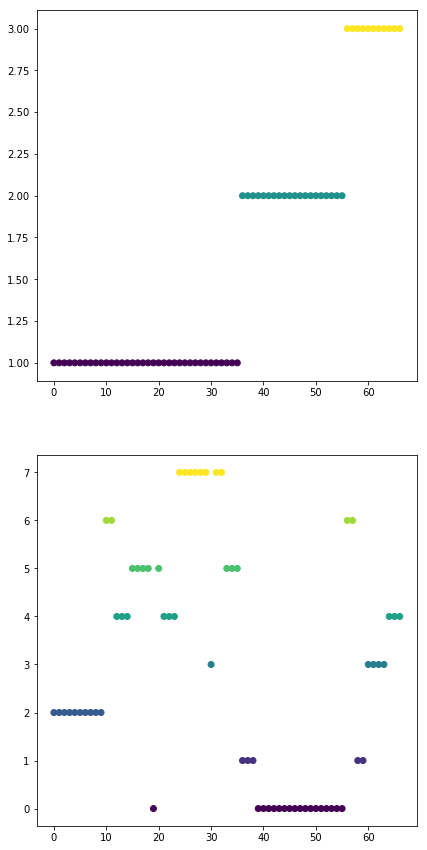

In [101]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, labels, c=labels, cmap=plt.viridis())
plt.show()

In [102]:
from sklearn.metrics import accuracy_score

newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 3
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 1
      
        #print(item)
    newlist.append(item)
newlist;
accuracy_score(yp,newlist)

0.8656716417910447

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()

0.7777777777777778


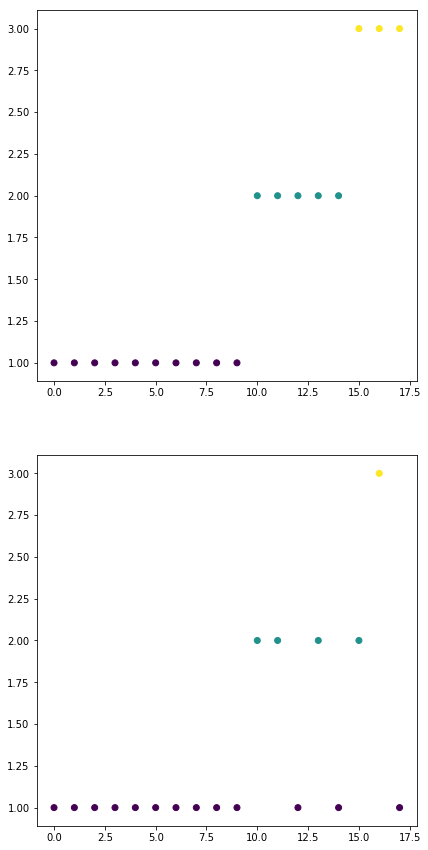

In [103]:
#prueba 


labels = modelhm.predict(dataprofeprueba)


newlist = []

for item in labels:
    #print(item)
    if item == 0  :
        item = 2
    elif item == 1  :
        item = 2
    elif item == 2  :
        item = 1
    elif item == 3  :
        item = 3
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 1    
    elif item == 6  :
        item = 1
    elif item == 7  :
        item = 1
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(ypruebaP,newlist))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofeprueba.shape[0])
y=yp

img = ax.scatter(x, ypruebaP, c=ypruebaP, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, newlist, c=newlist, cmap=plt.viridis())
plt.show()

en el numero de estados en GMMHMM n_components=7,n_mix=2 data entrenamiento 85% accuracy y prueba de 83%



In [ ]:
#Entrenando con PCA


modelhm=hmm.GMMHMM(n_components=10,n_mix=3) 
modelhm.fit(finalDf)
labels = modelhm.predict(principalDf)
#        gmm = GMM(n_components=j).fit(principalf)
#       labels = gmm.predict(principalf)
Amgmm[i,j]=accuracy_score(labels,finalf.target)
 



In [ ]:
Amgmmyt

 # Fuzzy cmeans

In [ ]:


from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=dataprofe.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

udes=np.argmax(U,axis=0)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, udes, c=udes, cmap=plt.viridis())
plt.show()

In [ ]:
b=udes+1
trans={3:'Alta',1:'Baja',2:'Media'}
udes1=[trans[item] for item in b]
trans={'Alta':3,'Baja':2,'Media':1}
udes2=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':3,'Media':1}
udes3=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':1,'Media':3}
udes4=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':3}
udes5=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':3,'Media':2}
udes6=[trans[item] for item in udes1]

print(accuracy_score(yp,udes2))
print(accuracy_score(yp,udes3))
print(accuracy_score(yp,udes4))
print(accuracy_score(yp,udes5))
print(accuracy_score(yp,udes6))

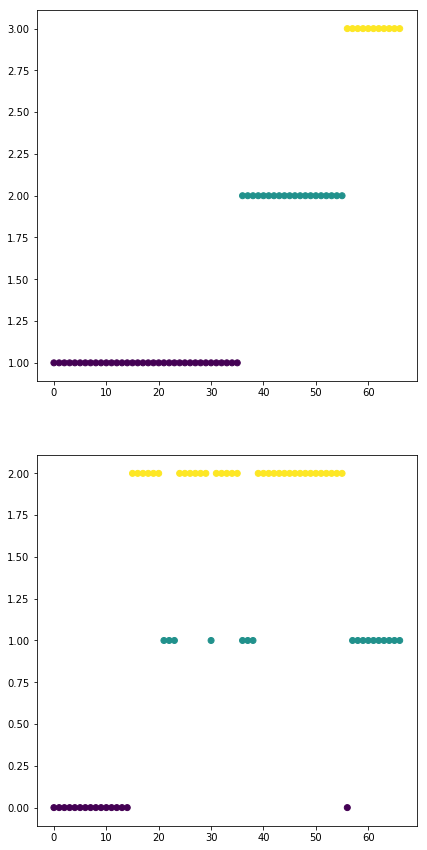

In [104]:

from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=finalDf.transpose(),c=3, m= 2, error=0.005, maxiter=1000, init=None)

udes=np.argmax(U,axis=0)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, udes, c=udes, cmap=plt.viridis())
plt.show()

0.05970149253731343
0.3283582089552239
0.6268656716417911
0.40298507462686567
0.31343283582089554


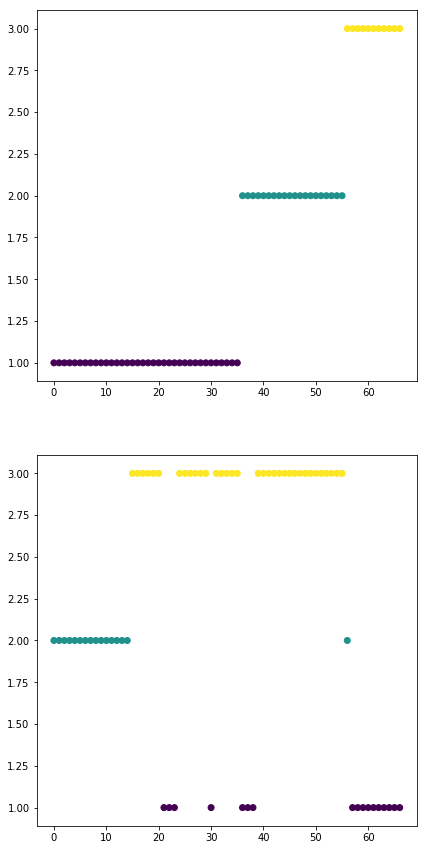

In [105]:
b=udes+1
trans={3:'Alta',1:'Baja',2:'Media'}
udes1=[trans[item] for item in b]
trans={'Alta':3,'Baja':2,'Media':1}
udes2=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':3,'Media':1}
udes3=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':1,'Media':3}
udes4=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':3}
udes5=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':3,'Media':2}
udes6=[trans[item] for item in udes1]

print(accuracy_score(yp,udes2))
print(accuracy_score(yp,udes3))
print(accuracy_score(yp,udes4))
print(accuracy_score(yp,udes5))
print(accuracy_score(yp,udes6))

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, udes2, c=udes2, cmap=plt.viridis())
plt.show()

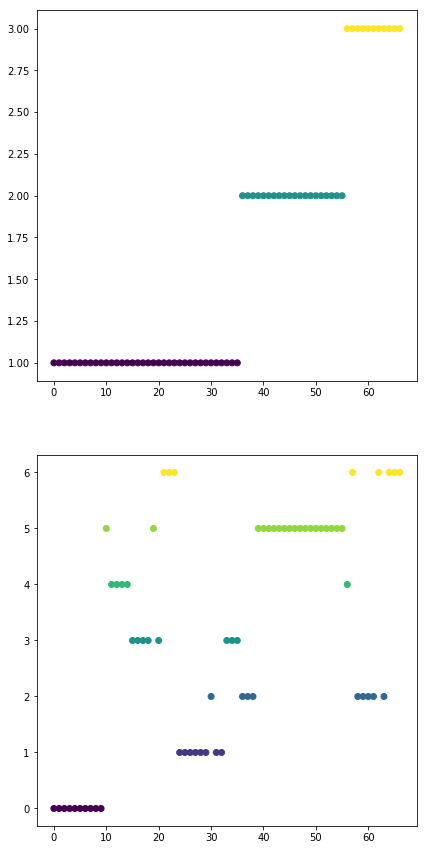

In [120]:

cntr, U, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        data=dataprofe.transpose(),c=7, m= 2, error=0.00005, maxiter=1000, init=None)

udes=np.argmax(U,axis=0)


fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, udes, c=udes, cmap=plt.viridis())
plt.show()

In [ ]:
udes

In [121]:
newlist = []

for item in udes:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2   
    elif item == 6  :
        item = 3 
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(yp,newlist))

0.8507462686567164


In [124]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    dataprofeprueba.transpose(),cntr, 2, error=0.05, maxiter=1000)

udes=np.argmax(u,axis=0)
udes

newlist=[]
for item in udes:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 1
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 2   
    elif item == 6  :
        item = 3  
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(ypruebaP,newlist))

0.7222222222222222


Text(0, 0.5, 'Fuzzy partition coefficient')

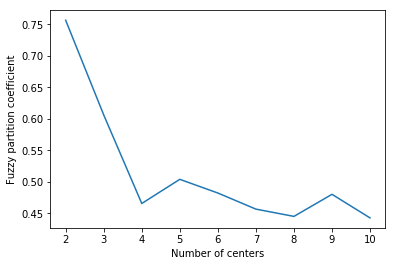

In [111]:
fpcs=[]
for ncenters in range(2, 11):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
        finalDf.transpose(), ncenters, 2, error=0.0005, maxiter=1000, init=None)

    # Store fpc values for later
    fpcs.append(fpc)

    # Plot assigned clusters, for each data point in training set
    cluster_membership = np.argmax(u, axis=0)  
    
    

fig2, ax2 = plt.subplots()
ax2.plot(np.r_[2:11], fpcs)
ax2.set_xlabel("Number of centers")
ax2.set_ylabel("Fuzzy partition coefficient")

In [ ]:
u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(
    finalDfprueba.transpose(),cntr, 2, error=0.05, maxiter=1000)

udes=np.argmax(u,axis=0)
udes

newlist=[]
for item in udes:
    #print(item)
    if item == 0  :
        item = 1
    elif item == 1  :
        item = 1
    elif item == 2  :
        item = 3
    elif item == 3  :
        item = 2
    elif item == 4  :
        item = 1
    elif item == 5  :
        item = 1    
        #print(item)
    newlist.append(item)
newlist;
print(accuracy_score(ypruebaP,newlist))

gk means: https://pure.tue.nl/ws/portalfiles/portal/3635433/Metis256338.pdf
https://github.com/ITE-5th/fuzzy-clustering/blob/master/algorithms/gk.py
http://w3.ualg.pt/~jvo/ml2015-16/ml2015-16L17.pdf

# GKMEANS

In [ ]:
import numpy as np
from scipy.linalg import norm


class GK:
    def __init__(self, n_clusters=4, max_iter=100, m=2, error=1e-6, epsil=1):
        super().__init__()
        self.u, self.centers, self.f = None, None, None
        self.clusters_count = n_clusters
        self.max_iter = max_iter
        self.m = m
        self.error = error
        self.epsil = epsil

    def fit(self, z):
        N = z.shape[0]
        C = self.clusters_count
        centers = []

        u = np.random.dirichlet(np.ones(N), size=C)

        iteration = 0
        while iteration < self.max_iter:
            u2 = u.copy()

            centers = self.next_centers(z, u)
            f,numerator,v = self._covariance(z, centers, u)
            dist = self._distance(z, centers, f)
            u = self.next_u(dist)
            iteration += 1

            # Stopping rule
            if norm(u - u2) < self.error:
                break

        self.f = f
        self.u = u
        self.centers = centers
        return centers, f, u ,numerator,v

    def next_centers(self, z, u):
        um = u ** self.m
        return ((um @ z).T / um.sum(axis=1)).T

    def _covariance(self, z, v, u):
        um = u ** self.m

        denominator = um.sum(axis=1).reshape(-1, 1, 1)
        temp = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        temp = np.matmul(temp, temp.transpose((0, 1, 3, 2)))
        numerator = um.transpose().reshape(um.shape[1], um.shape[0], 1, 1) * temp
        numerator = numerator.sum(0)

        return numerator / denominator, numerator ,v

    def _distance(self, z, v, f):
        epsil=self.epsil
        dif = np.expand_dims(z.reshape(z.shape[0], 1, -1) - v.reshape(1, v.shape[0], -1), axis=3)
        determ = np.power(np.linalg.det(f), 1 / self.m)
        det_time_inv = determ.reshape(-1, 1, 1) * np.linalg.pinv(f)
        temp = epsil*np.matmul(dif.transpose((0, 1, 3, 2)), det_time_inv)
        output = np.matmul(temp, dif).squeeze().T
        return np.fmax(output, 1e-8)

    def next_u(self, d):
        power = float(1 / (self.m - 1))
        d = d.transpose()
        denominator_ = d.reshape((d.shape[0], 1, -1)).repeat(d.shape[-1], axis=1)
        denominator_ = np.power(d[:, None, :] / denominator_.transpose((0, 2, 1)), power)
        denominator_ = 1 / denominator_.sum(1)
        denominator_ = denominator_.transpose()

        return denominator_

    def predict(self, z):
        if len(z.shape) == 1:
            z = np.expand_dims(z, axis=0)

        dist = self._distance(z, self.centers, self.f)
        if len(dist.shape) == 1:
            dist = np.expand_dims(dist, axis=0)

        u = self.next_u(dist)
        return np.argmax(u, axis=0)

In [ ]:
X=dataprofe
X=X.values
MAX_ITER = 500
m = 2
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER, m=3)
gk_centers,f,u ,numerator,v = gk.fit(X)

b=gk.predict(X)+1

In [ ]:


trans={3:'Alta',1:'Baja',2:'Media'}
udes1=[trans[item] for item in b]
trans={'Alta':3,'Baja':2,'Media':1}
udes2=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':3,'Media':1}
udes3=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':1,'Media':3}
udes4=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':3}
udes5=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':3,'Media':2}
udes6=[trans[item] for item in udes1]

print(accuracy_score(yp,udes2))
print(accuracy_score(yp,udes3))
print(accuracy_score(yp,udes4))
print(accuracy_score(yp,udes5))
print(accuracy_score(yp,udes6))



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x, udes3, c=udes3, cmap=plt.viridis())
plt.show()

In [ ]:
X=dataprofe
X=X.values
MAX_ITER = 1000
m = 1.7
number_of_clusters = 3
gk = GK(number_of_clusters, MAX_ITER)
gk_centers,f,u ,numerator,v = gk.fit(X)

b=gk.predict(X)+1


trans={3:'Alta',1:'Baja',2:'Media'}
udes1=[trans[item] for item in b]
trans={'Alta':3,'Baja':2,'Media':1}
udes2=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':3,'Media':1}
udes3=[trans[item] for item in udes1]
trans={'Alta':2,'Baja':1,'Media':3}
udes4=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':2,'Media':3}
udes5=[trans[item] for item in udes1]
trans={'Alta':1,'Baja':3,'Media':2}
udes6=[trans[item] for item in udes1]

print(accuracy_score(yp,udes2))
print(accuracy_score(yp,udes3))
print(accuracy_score(yp,udes4))
print(accuracy_score(yp,udes5))
print(accuracy_score(yp,udes6))




In [ ]:

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(2,2,1)
x=np.arange(dataprofe.shape[0])
y=yp

img = ax.scatter(x, yp, c=yp, cmap=plt.viridis())
axx = fig.add_subplot(2,2,3)
img = axx.scatter(x,udes5, c=udes5, cmap=plt.viridis())
plt.show()
